## Jupyter notebook for the Bioinformatics paper 'Inferring the perturbation time from biological time course data'

In [287]:
library(DEtime)
library(ggplot2)
library(reshape2)
library(RColorBrewer)

### Create an example covariance matrix with no crossing for illustration purposes:

In [288]:
times <- seq(0,100,2)  ## sample time points
replicate_no <- 2 ## replicate number for the samples
len_times <- length(times)
times_withreplicate <- rep(times, replicate_no)
times_withreplicate2 <- rep(times_withreplicate,2)
dim(times_withreplicate) <- c(1,length(times_withreplicate))
dim(times_withreplicate2) <- c(1,length(times_withreplicate2))

times_test <- times  ## time points for branching test, can be differ from original time points

### use default RBF kernel as the basis kernel
alpha = 1.0 ## variance hyperparameter for the RBF kernel
ls = 500.0 ## lengthscale hyperparameter for the RBF kernel
sigman = 0.001 ## nugget noise variance parameter 

kern <- list()
K0 <- DEtimeKernParamInit(kern) ## initialize the kernel
K0$inverseWidth <- 1.0/ls
K0$variance <- alpha


### Original covariance matrix

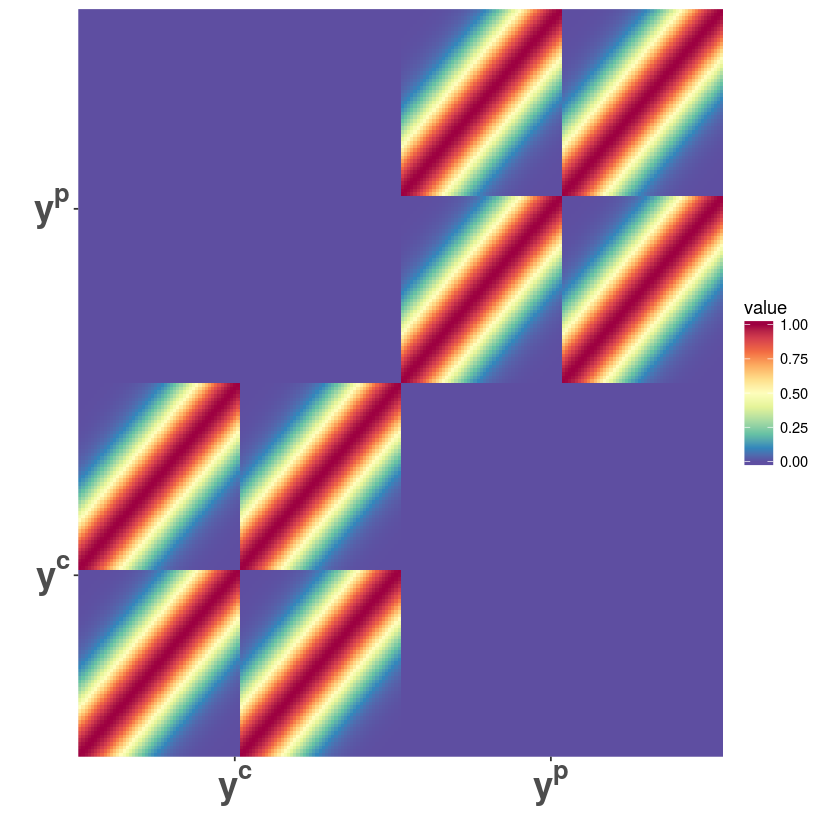

In [295]:

K0$xp <- -2000  ## xp is the defined branching point, a very small negative xp indicates two independent GPs
K <- DEtimeRBFKernCompute(K0, times_withreplicate2) ## Generate the DEtime kernel 
#par(mar = c(5,5,5,5))

#fields::image.plot(K, xlab="times",
# ylab="times", axes=FALSE)
myPalette <- colorRampPalette(rev(brewer.pal(11, "Spectral")), space="Lab")
dimnames(K) <- list(Var1=c(1:length(times_withreplicate2)),Var2=c(1:length(times_withreplicate2)))
#pdf("covariance_original.pdf")
p <- ggplot(melt(K), aes(Var1,Var2,fill=value))+xlab("") + ylab("") +   geom_raster() + scale_fill_gradientn(colours = myPalette(100))
p <- p +  scale_x_discrete(limits=c(50,150), labels=c(expression(bold(y^"c")),expression(bold(y^"p"))))  +  scale_y_discrete(limits=c(50,150), labels=c(expression(bold(y^"c")),expression(bold(y^"p")))) 
p + theme(axis.text.x = element_text(face="bold",size=22), axis.text.y = element_text(face="bold", size=22))
#dev.off()

### Revised covariance matrix with perturbation occuring at time 50

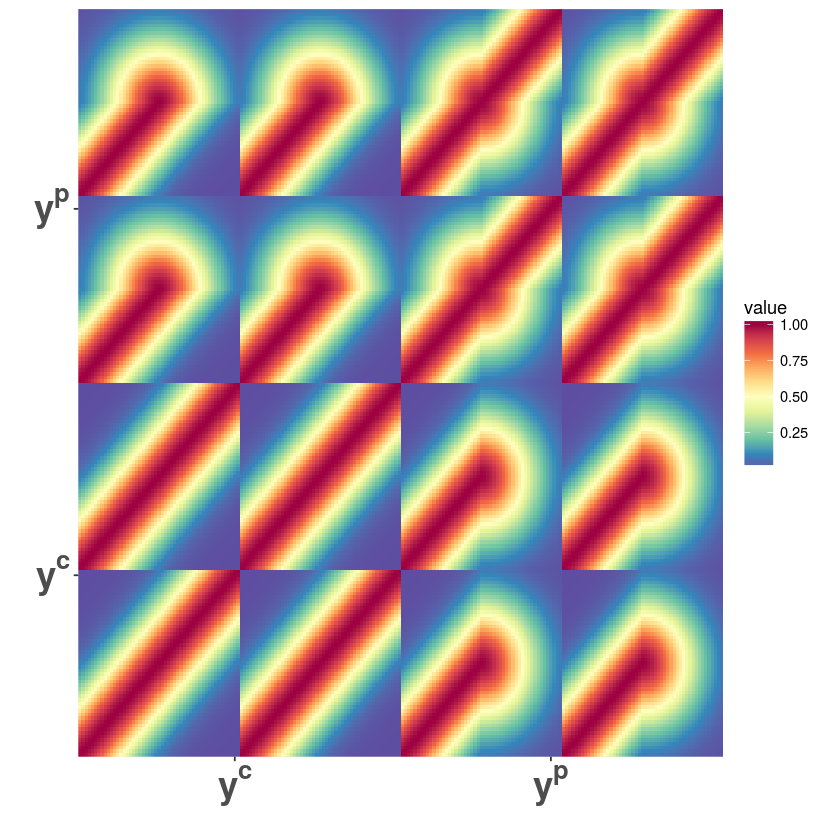

In [296]:
K0$xp <- 50
K <- DEtimeKernCompute(K0, times_withreplicate2)

dimnames(K) <- list(Var1=c(1:length(times_withreplicate2)),Var2=c(1:length(times_withreplicate2)))
#fields::image.plot(K)  ## plot the covariance matrix
#fields::image.plot(K, xlab="times",
# ylab="times", axes=FALSE)

#pdf("covariance_revised.pdf")
myPalette <- colorRampPalette(rev(brewer.pal(11, "Spectral")), space="Lab")
dimnames(K) <- list(Var1=c(1:length(times_withreplicate2)),Var2=c(1:length(times_withreplicate2)))
#pdf("covariance_revised.pdf")
p <- ggplot(melt(K), aes(Var1,Var2,fill=value))+xlab("") + ylab("") +   geom_raster() + scale_fill_gradientn(colours = myPalette(100))
p <- p + scale_x_discrete(limits=c(50,150), labels=c(expression(bold(y^"c")),expression(bold(y^"p"))))  +  scale_y_discrete(limits=c(50,150), labels=c(expression(bold(y^"c")),expression(bold(y^"p")))) 
p <- p + theme(axis.text.x = element_text(face="bold",size=22), axis.text.y = element_text(face="bold", size=22))
p
#dev.off()

### Generate simulated data based on default RBF kernel, Matern32 or Matern12 kernels

In [297]:

### generate simulated data 
N <- 6
RowSize <- N
ColSize <- 2*replicate_no*len_times
BlockSize <- N*ColSize
mu <- rep(0,ColSize)
data_normal_n  <- matrix(, nrow=RowSize, ncol=ColSize)
data_matern32_n  <- matrix(, nrow=RowSize, ncol=ColSize)
data_matern12_n  <- matrix(, nrow=RowSize, ncol=ColSize)

K0$xp <- 50
K <- DEtimeKernCompute(K0,times_withreplicate2)
data_normal_n[1:N,] <- MASS::mvrnorm(N, mu, K) + matrix(rnorm(BlockSize,sd=0.001),nrow=N,ncol=ColSize)
K <- DEtimeMatern32KernCompute(K0,times_withreplicate2)
data_matern32_n[1:N,] <- MASS::mvrnorm( N, mu, K) + matrix(rnorm(BlockSize,sd=sigman),nrow=N,ncol=ColSize)
K <- DEtimeMatern12KernCompute(K0,times_withreplicate2)
data_matern12_n[1:N,] <- MASS::mvrnorm( N, mu, K) + matrix(rnorm(BlockSize,sd=sigman),nrow=N,ncol=ColSize)


### Illustrate the simulated data (using RBF kernel as the basis kernel here)

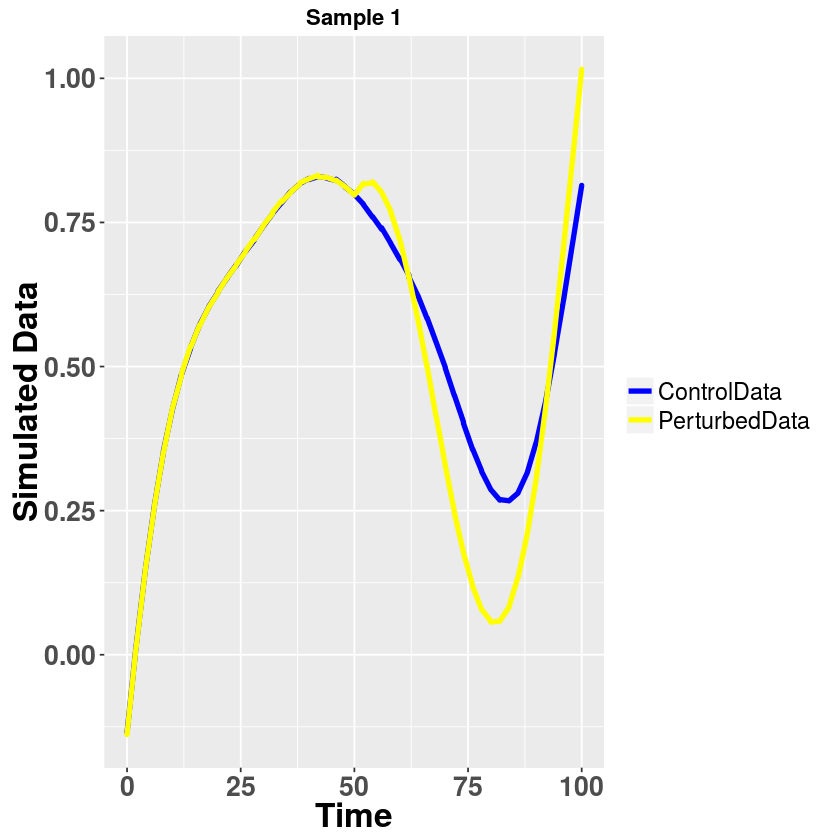

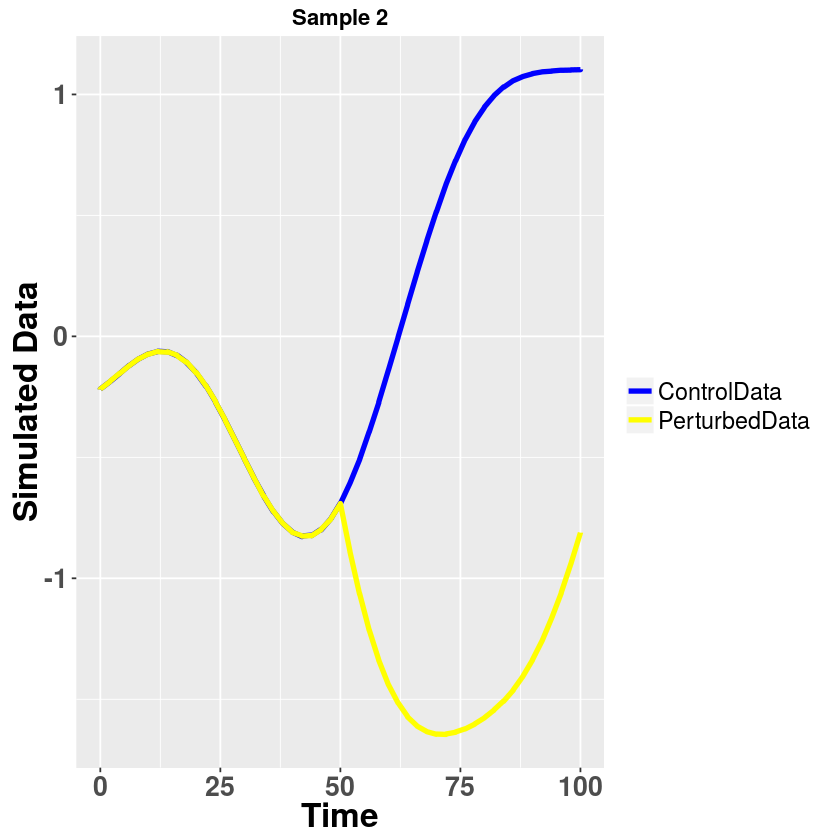

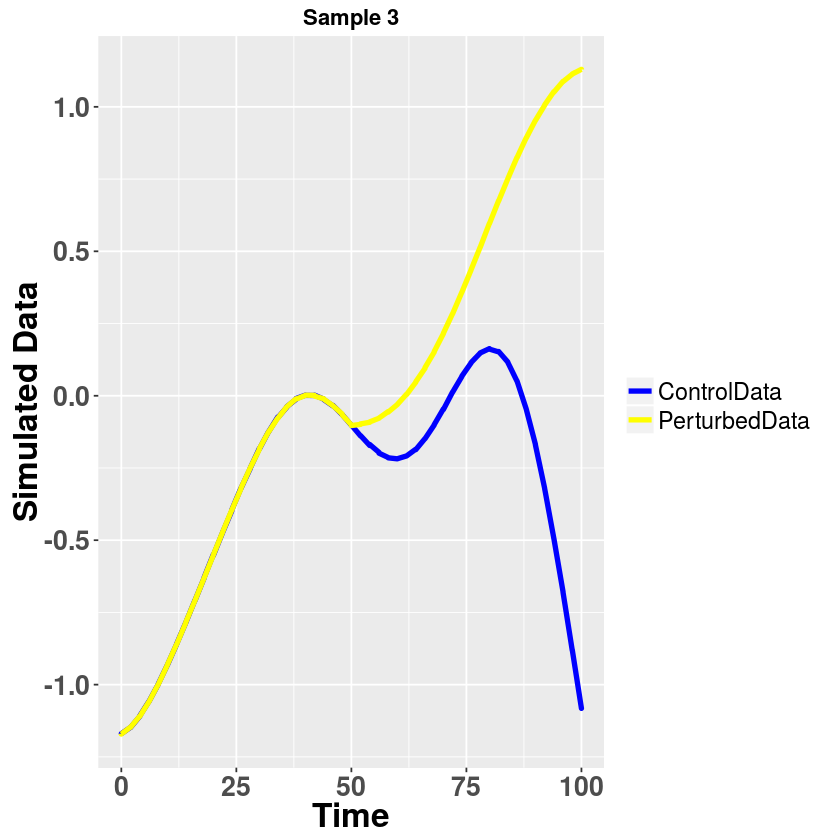

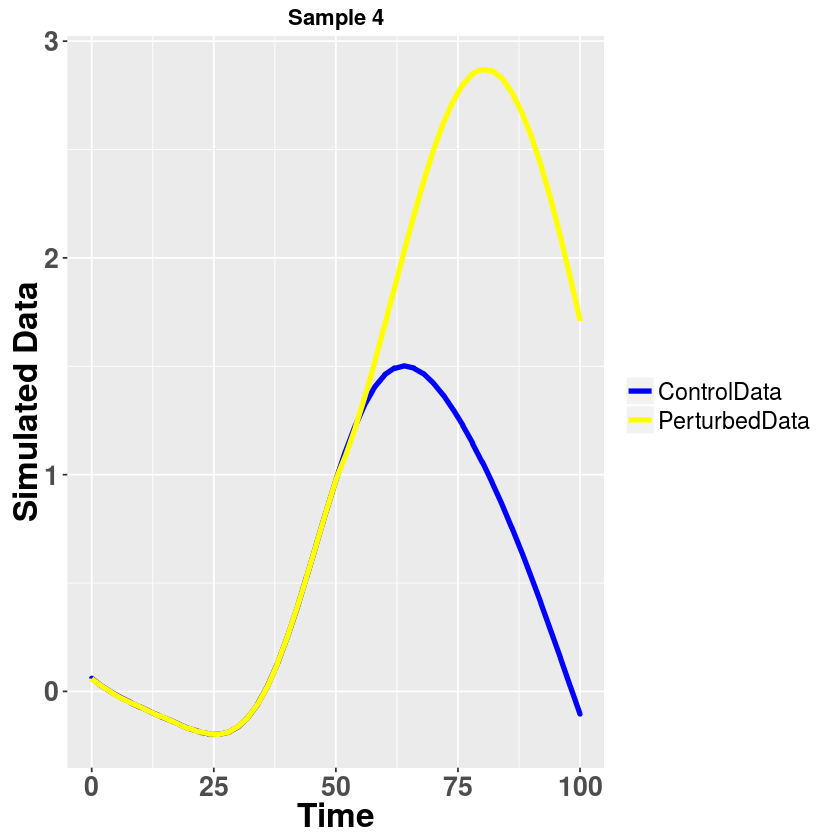

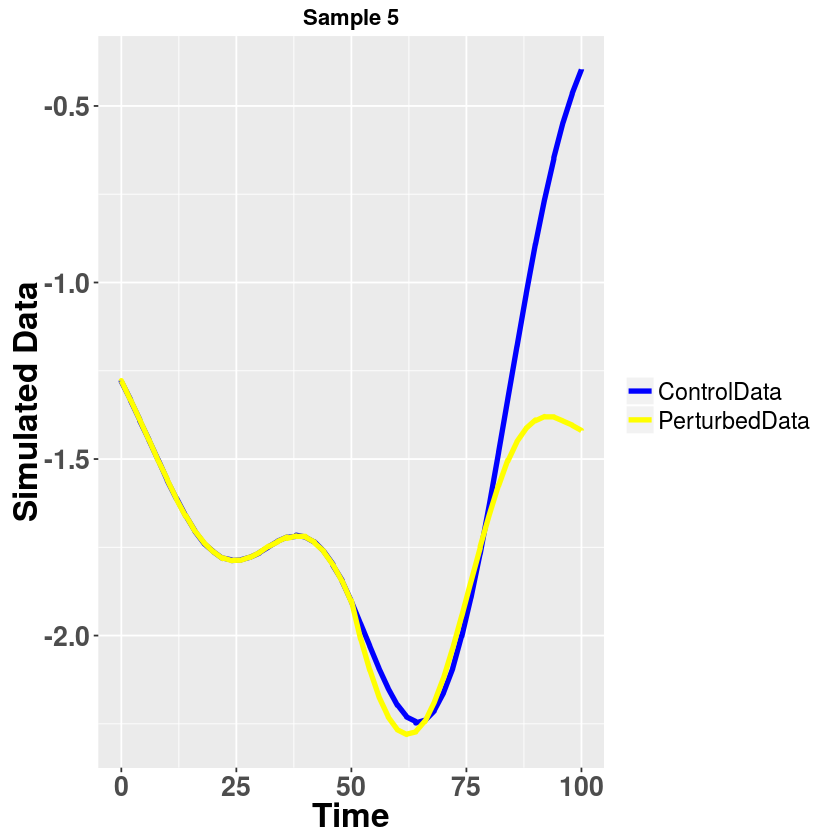

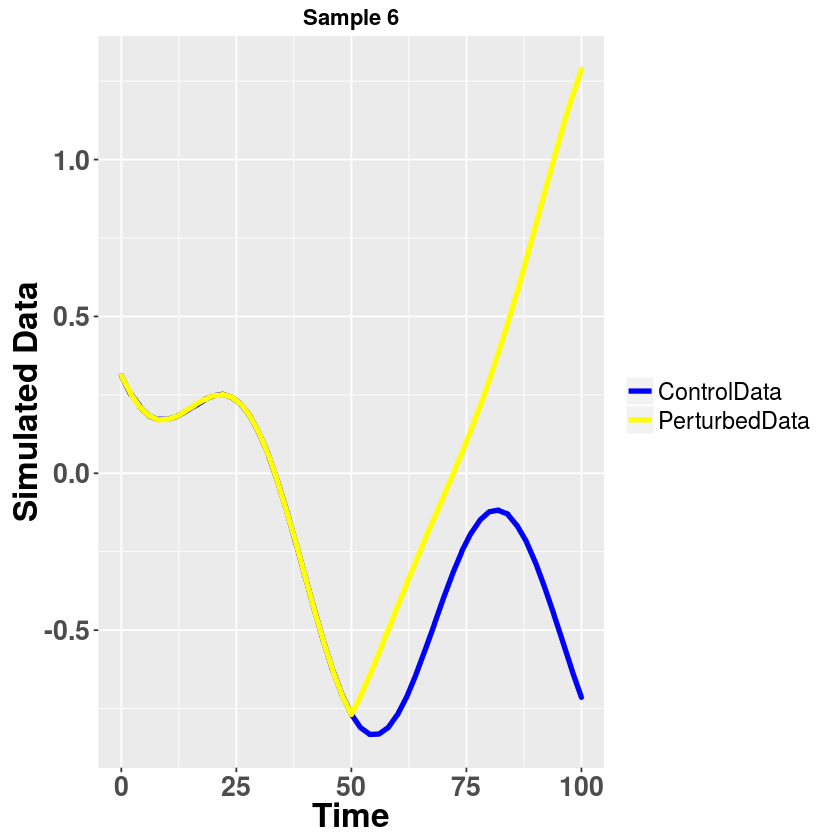

In [298]:

ControlData <- data_normal_n[1:N,1:(replicate_no*len_times)]
PerturbedData <- data_normal_n[1:N,(replicate_no*len_times+1):(2*replicate_no*len_times)]

#dim(ControlData) <- c(N,replicate_no*len_times)
#dim(PerturbedData) <- c(N,replicate_no*len_times)  


#pdf("example.pdf")
#par(cex = 1.0)
#par(mar = c(2, 2, 0, 0), oma = c(1, 1, 1, 1),pin=c(1.9,1.9))

#xlim = range(c(times))
#for (i in 1:N) {
#    ylim = range(c(PerturbedData[i,],ControlData[i,]))
#    plot(1, 1, xlim = xlim, ylim = ylim, type = "n")
#    for (j in 1:replicate_no) {
#        lines(times,ControlData[i,((j-1)*length(times)+1):(j*length(times))],col='red', lwd=.5, lty = 1, xlab='times',ylab='sampled data')
#        lines(times,PerturbedData[i,((j-1)*length(times)+1):(j*length(times))],col='black', lwd=.5, lty = 1)
        
#    }
#}
#dev.off()

#data_1 <- matrix(cbipdf("sample1.pdf")nd(t(times_withreplicate), data_normal_n[1,1:length(times_withreplicate)], data_normal_n[1,(length(times_withreplicate)+1):(2*length(times_withreplicate))]))
for (i in 1:N) {
    
  pdf(toString(paste(i,"nonoise.pdf",sep=""))) ## comment it if you want to see the figure on screen
  #df("1nonoise.pdf")
  Data <- data.frame(x = t(times_withreplicate), ControlData = (data_normal_n[i,1:length(times_withreplicate)]), PerturbedData = (data_normal_n[i,(length(times_withreplicate)+1):(2*length(times_withreplicate))]))


  melted_Data <- melt(Data, id.vars=c("x"))
  #print(melted_Data)
  p <- ggplot() + geom_line(data=melted_Data, aes(x=x, y=value, color=variable), size=1.5) + xlab("Time") + ylab("Simulated Data") + scale_color_manual(values=c("blue", "yellow")) 
  p <- p + theme(legend.title=element_blank(),legend.text=element_text(size=14)) +  ggtitle(toString(paste("Sample ",i,sep=""))) + theme(plot.title = element_text(lineheight=.8, face="bold"))
  p <- p + theme(axis.text.x = element_text(face="bold", size=16), axis.text.y = element_text(face="bold", size=16))
  p <- p + theme(axis.title.x = element_text(face="bold",size=20), axis.title.y = element_text(face="bold", size=20))
  print(p)
  dev.off() ### comment it if you want to see figure on screen
}


### Create noised sample data 

In [299]:
data_normal_n_withnoise  <- matrix(, nrow=RowSize, ncol=ColSize)
data_normal_n_withnoise[1:N,] <-  data_normal_n[1:N,] + matrix(rnorm(BlockSize,sd=0.05),nrow=N,ncol=ColSize)

### Illustrate the data

In [300]:
for (i in 1:N) {
  pdf(toString(paste(i,"withnoise.pdf",sep=""))) ## comment it if you want to see the figure on screen
  #df("1nonoise.pdf")
  Data <- data.frame(x = t(times_withreplicate), ControlData = (data_normal_n_withnoise[i,1:length(times_withreplicate)]), PerturbedData = (data_normal_n_withnoise[i,(length(times_withreplicate)+1):(2*length(times_withreplicate))]))

  melted_Data <- melt(Data, id.vars=c("x"))
  #print(melted_Data)
  p <- ggplot() + geom_line(data=melted_Data, aes(x=x, y=value, color=variable), size=1.5) + xlab("Time") + ylab("Simulated Data") + scale_color_manual(values=c("blue", "yellow")) 
  p <- p + theme(legend.title=element_blank(),legend.text=element_text(size=14)) +  ggtitle(toString(paste("Sample ",i,sep=""))) + theme(plot.title = element_text(lineheight=.8, face="bold"))
  p <- p + theme(axis.text.x = element_text(face="bold", size=16), axis.text.y = element_text(face="bold", size=16))
  p <- p + theme(axis.title.x = element_text(face="bold",size=20), axis.title.y = element_text(face="bold", size=20))
  print(p)
  dev.off() ## comment it if you want to see the figure on screen
}

### Carrying out the branching point inference algorithm

In [301]:
ControlData = data_normal_n_withnoise[,1:length(times_withreplicate)]
PerturbedData = data_normal_n_withnoise[,(length(times_withreplicate)+1):(2*length(times_withreplicate))]

res <- DEtime_infer(times = times_withreplicate, ControlData = ControlData, PerturbedData = PerturbedData)


### Print the MAP, mean, median, 5 percentile and 95 percentile of the estimated branching point

In [302]:
print_DEtime(res)

Perturbation point inference results from DEtime package: 
  gene_ID   MAP  mean median  ptl5 ptl95
1       1 48.00 45.96  48.00 38.00 50.00
2       2 50.00 49.91  50.00 50.00 50.00
3       3 48.00 47.39  48.00 40.00 52.00
4       4 54.00 52.94  54.00 48.00 56.00
5       5 50.00 49.35  50.00 38.00 64.00
6       6 50.00 49.28  50.00 46.00 50.00


### Illustrate the GP regression results for each gene

[1] 1 2 3 4 5 6
All genes will be plotted 
1 is plotted
2 is plotted


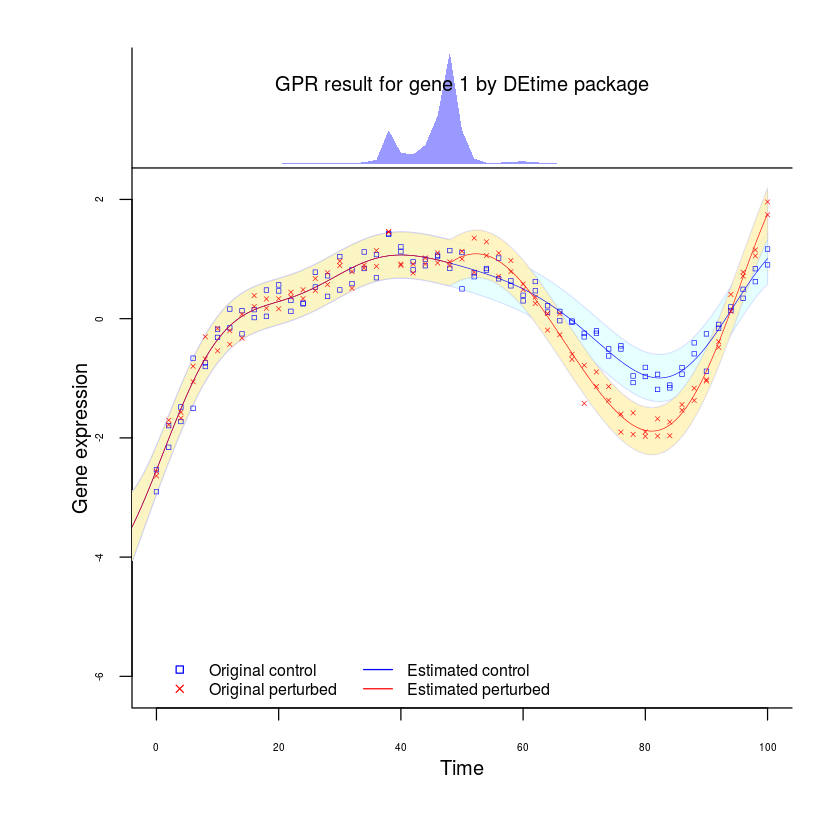

3 is plotted


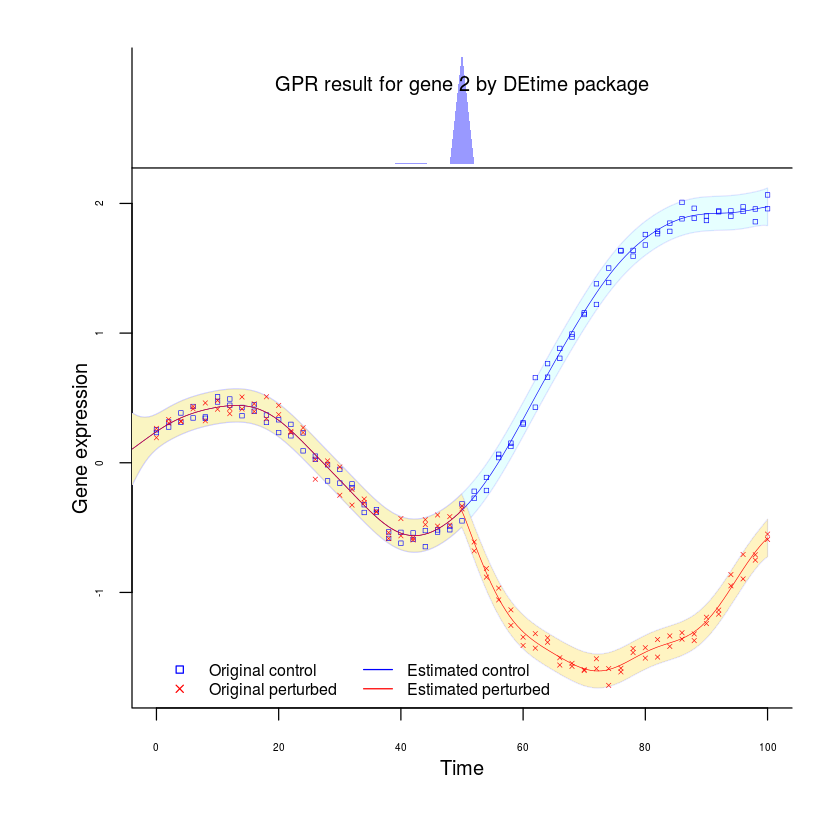

4 is plotted


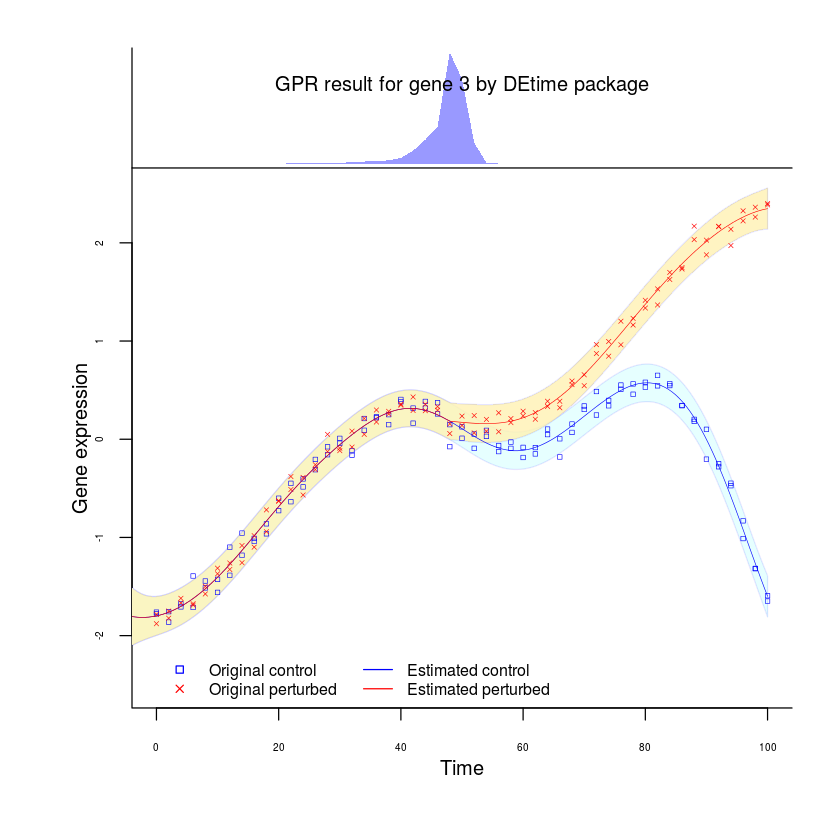

5 is plotted


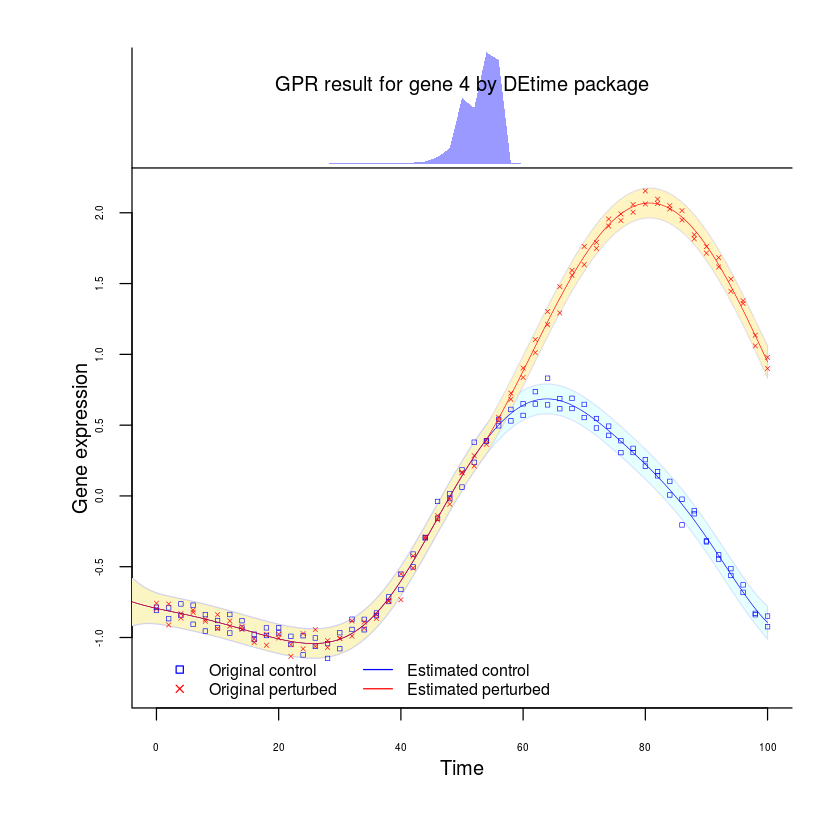

6 is plotted


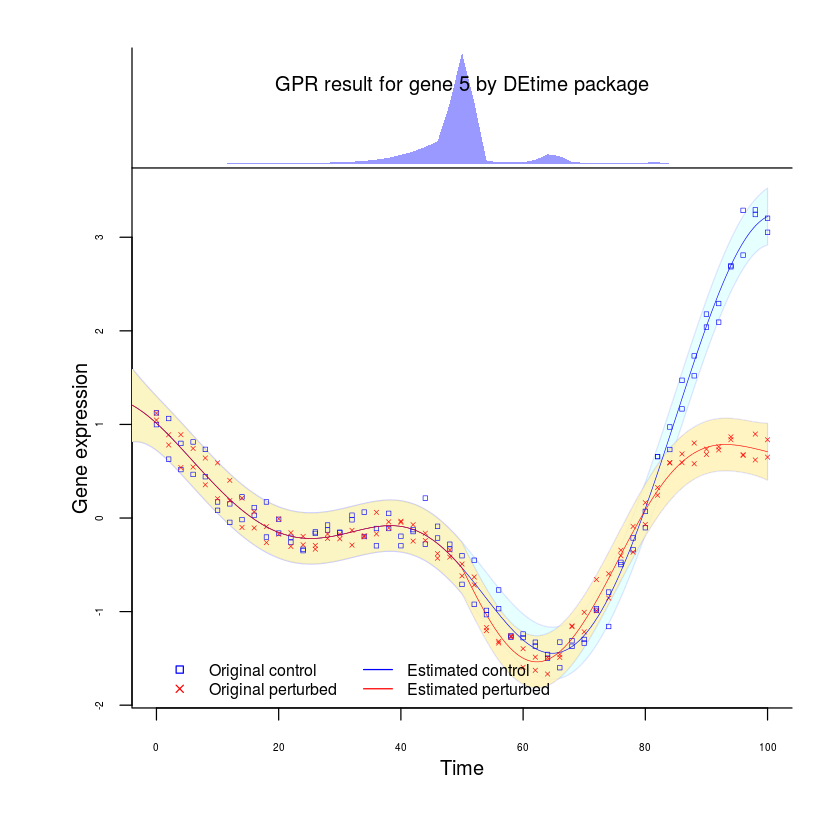

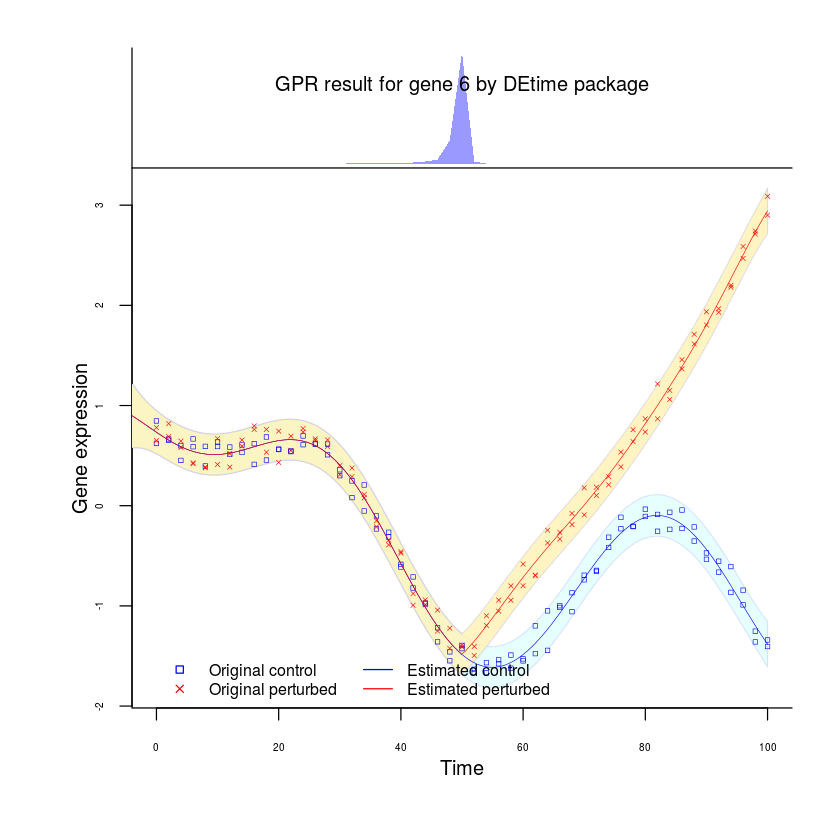

In [303]:
pdf("result.pdf")  ## comment it if you want to see the figure on screen
plot_DEtime(res)
dev.off()  ## comment it if you want to see the figure on screen